In [3]:
import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(10000)
data.tail()

data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()



Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

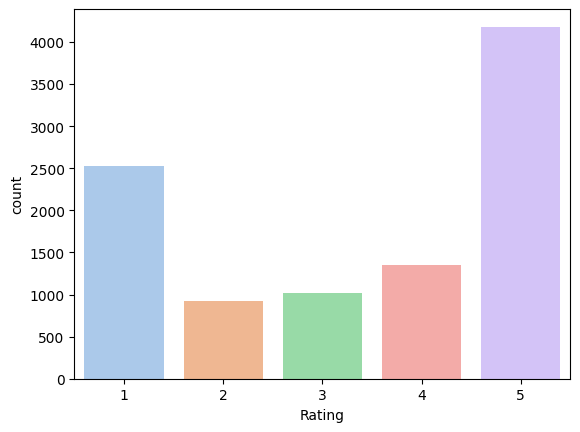

In [4]:
import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [5]:
def transform_ratings(rating):
 if rating == 5 or rating == 4:
    return "Good"
 if rating == 3:
    return "Neutral"
 if rating == 2 or rating == 1:
    return "Bad"

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


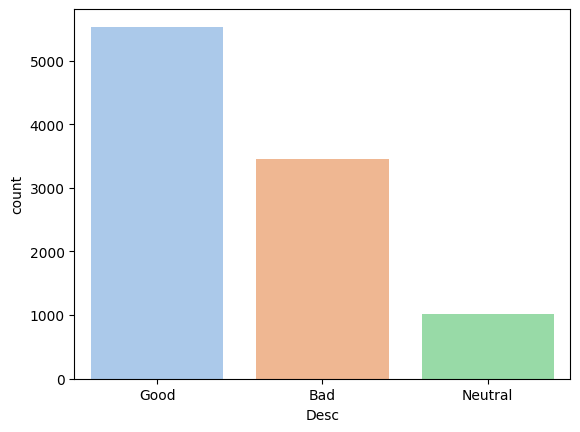

In [6]:
data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()


<AxesSubplot: xlabel='length', ylabel='Total_thumbsup'>

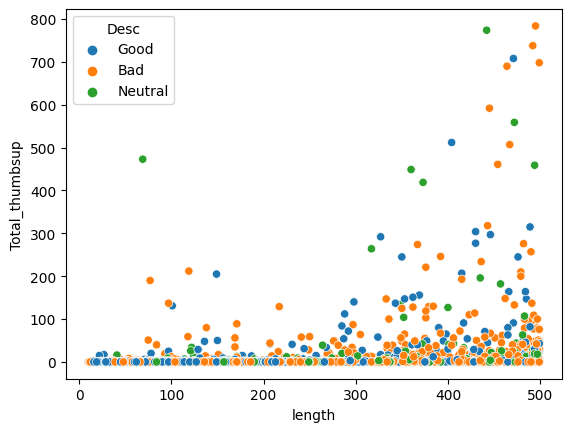

In [7]:
sns.scatterplot(x=data['length'][data.length < 500], 
y=data['Total_thumbsup'][data.Total_thumbsup < 800], 
hue=data['Desc'])

     ------------------------------------ 153.1/153.1 kB 126.9 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


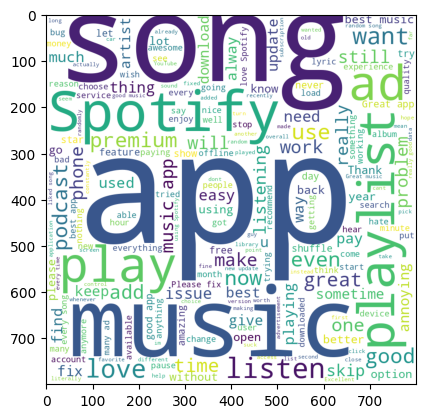

In [8]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = " ".join(data.loc[:,'Review'])
wordcloud = WordCloud(width = 800, height = 800, 
 background_color ='white', 
 min_font_size = 10).generate(reviews)
plt.imshow(wordcloud) 

In [20]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
x: " ".join(x.lower() for x in x.split()))
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
word: re.sub('[^a-z A-Z 0-9-]+', '', word))

stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
word: " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda
word:" ".join(stemmer.stem(word) for word in word.split())) 
data.head()["Review"] 

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([2, 1, 1, ..., 0, 1, 1])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)


  (0, 352)	1
  (0, 964)	1
  (0, 3683)	1
  (0, 3952)	1
  (0, 4379)	1
  (0, 5111)	1
  (0, 5130)	1
  (0, 6396)	1
  (0, 6954)	1
  (0, 6978)	1
  (0, 7092)	2
  (0, 7466)	1
  (0, 7712)	1
  (0, 7905)	1
  (1, 633)	1
  (1, 2634)	1
  (1, 4125)	1
  (1, 4540)	1
  (1, 4768)	1
  (1, 4996)	1
  (1, 6546)	1
  (1, 6954)	1
  (1, 7905)	1
  (2, 2360)	1
  (2, 2525)	1
  :	:
  (7497, 6934)	1
  (7497, 6945)	1
  (7497, 6954)	1
  (7497, 6968)	1
  (7497, 6998)	4
  (7497, 7092)	4
  (7497, 7142)	1
  (7497, 7223)	1
  (7497, 7461)	1
  (7497, 7486)	1
  (7497, 7619)	1
  (7497, 7713)	2
  (7497, 7754)	1
  (7497, 7807)	1
  (7497, 7884)	1
  (7497, 7905)	3
  (7497, 7911)	1
  (7498, 562)	1
  (7498, 996)	1
  (7498, 5138)	1
  (7498, 6410)	1
  (7499, 829)	1
  (7499, 4659)	1
  (7499, 5186)	1
  (7499, 6632)	1


In [16]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 7519)	0.07490028875801999
  (0, 7511)	0.07353407548798034
  (0, 7488)	0.0941514083761351
  (0, 7485)	0.09334078444204459
  (0, 7407)	0.13728034844526585
  (0, 7406)	0.08041915486866855
  (0, 7375)	0.07938508746750032
  (0, 7186)	0.08787779974554151
  (0, 7184)	0.06943104807317253
  (0, 6932)	0.07835523957376211
  (0, 6927)	0.04750308223308993
  (0, 6717)	0.16354492663552367
  (0, 6694)	0.07926875437554948
  (0, 6581)	0.10602000136559549
  (0, 6580)	0.09716128817603348
  (0, 6515)	0.09372649044469887
  (0, 6511)	0.07894679133526002
  (0, 6423)	0.12364791225466325
  (0, 6418)	0.07028959085381899
  (0, 6387)	0.07283330179898297
  (0, 6325)	0.04411087467607034
  (0, 6309)	0.11556286365869153
  (0, 6308)	0.08858120373065938
  (0, 6279)	0.06319649768494728
  (0, 6268)	0.05098452719307242
  :	:
  (7499, 4241)	0.22430618158847357
  (7499, 4218)	0.09357523844226164
  (7499, 3796)	0.14051479316549553
  (7499, 3790)	0.21817234342587055
  (7499, 3788)	0.23032823197713825
  (7499, 2380)	0.170